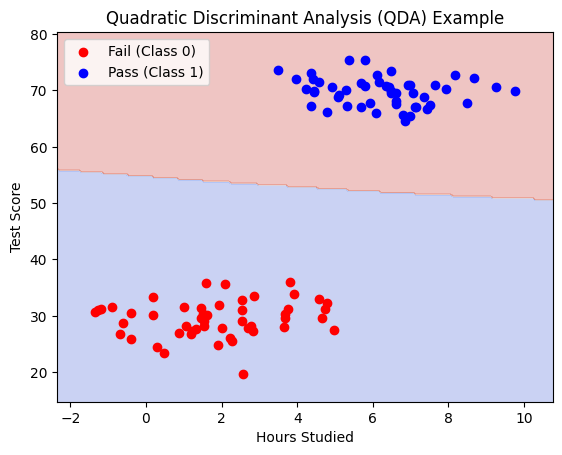

In [6]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Step 2: Create dataset (two Gaussian blobs with different covariance)
np.random.seed(42)
# Class 0: Fail (less study, lower score, more spread)
X0 = np.random.multivariate_normal([2, 30], [[3, 1], [1, 15]], 50)
# Class 1: Pass (more study, higher score, tighter cluster)
X1 = np.random.multivariate_normal([6, 70], [[2, -1], [-1, 8]], 50)

X = np.vstack((X0, X1))
y = np.array([0]*50 + [1]*50)

# Step 3: Fit QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)

# Step 4: Predict decision regions
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-5, X[:,1].max()+5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 5: Plot
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X0[:,0], X0[:,1], color="red", label="Fail (Class 0)")
plt.scatter(X1[:,0], X1[:,1], color="blue", label="Pass (Class 1)")

plt.xlabel("Hours Studied")
plt.ylabel("Test Score")
plt.title("Quadratic Discriminant Analysis (QDA) Example")
plt.legend()
plt.show()
